In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
from scipy.spatial import distance
from IPython.display import display
import scipy.stats as spstat
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import WLS
PLOTS_PATH = "C:/Users/mein/Desktop/Cognitive Science/Saivr/Data/Cohort2/plots/"
POS_PATH = "C:/Users/mein/Desktop/Cognitive Science/Saivr/Data/Positions/"
CSV_PATH = "C:/Users/mein/Desktop/Cognitive Science/Saivr/Data/Cohort2/csv_files/"
os.makedirs(os.path.dirname(PLOTS_PATH), exist_ok=True)

In [2]:
DATA_PATH = "C:/Users/mein/Desktop/Cognitive Science/Saivr/Data/"
# not used up yet
#EYE_DATA_PATH = "./ET_data/"

# 1. Accuracy as a function of group, task and time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
Subject        744 non-null int64
Task           744 non-null object
Time           744 non-null object
Measurement    744 non-null int64
Repeated       744 non-null object
Accuracy       744 non-null float64
Group          744 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 40.8+ KB


None

,Group,Repeated,Task,Time,Measurement,Accuracy [%]
4,Control,a,Absolute,Inf,1,52.777778
5,Control,a,Absolute,Inf,2,52.777778
6,Control,a,Absolute,Inf,3,38.888889
7,Control,a,Absolute,Inf,4,55.555556
12,Control,a,Pointing,Inf,1,50.000000
...,...,...,...,...,...,...
735,Exp,sq,Pointing,Inf,4,52.777778
740,Exp,sq,Relative,Inf,1,50.000000
741,Exp,sq,Relative,Inf,2,52.777778
742,Exp,sq,Relative,Inf,3,58.333333


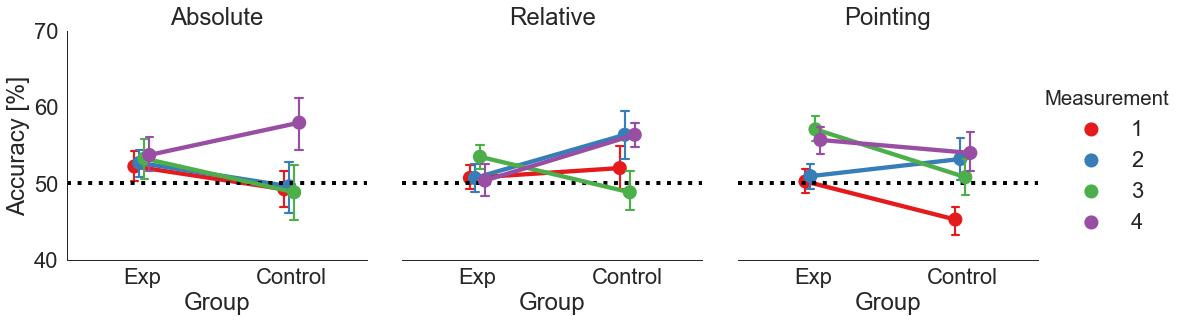

In [18]:
tmpdf = pd.read_csv(CSV_PATH + 'task_time_accuracy.csv')
display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .groupby(['Group','Repeated','Task','Time','Measurement'])
    .agg({'Accuracy':'mean'})
    .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
    .query('Time == "Inf"')
)

display(tmpdf)
sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,9)})
g = sns.catplot(data=tmpdf, x='Group', y='Accuracy [%]',hue='Measurement', kind='point',
                col='Task', col_order=['Absolute','Relative','Pointing'], order=["Exp", "Control"],
                 ci=68, capsize=0.05, 
                dodge=0.1,scale=2
#                  edgecolor=(0,0,0),errwidth=3,linewidth=2.5
           )

g.set(yticks=np.arange(40,80,10))
i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 :
        ax.spines['left'].set_visible(False)
    ax.set(ylim=(40,70))
    ax.set_title(title)
plt.savefig(PLOTS_PATH+'task_time_accuracy_measurement_inf.png', quality=90)
#plt.savefig(PLOTS_PATH+'/group_task_time_accuracy.eps', quality=90)

# 2. Accuracy as function of Alignment to North

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
Subject         1736 non-null int64
AngleToNorth    1736 non-null int64
Time            1736 non-null object
Measurement     1736 non-null int64
Repeated        1736 non-null object
Accuracy        1736 non-null float64
Group           1736 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 95.1+ KB


None

,Group,Repeated,AngleToNorth,Time,Accuracy [%]
0,Control,a,0,3s,37.500000
1,Control,a,0,Inf,50.000000
2,Control,a,30,3s,58.333333
3,Control,a,30,Inf,60.000000
4,Control,a,60,3s,39.285714
...,...,...,...,...,...
429,Exp,sq,120,Inf,35.714286
430,Exp,sq,150,3s,41.666667
431,Exp,sq,150,Inf,57.142857
432,Exp,sq,180,3s,66.666667


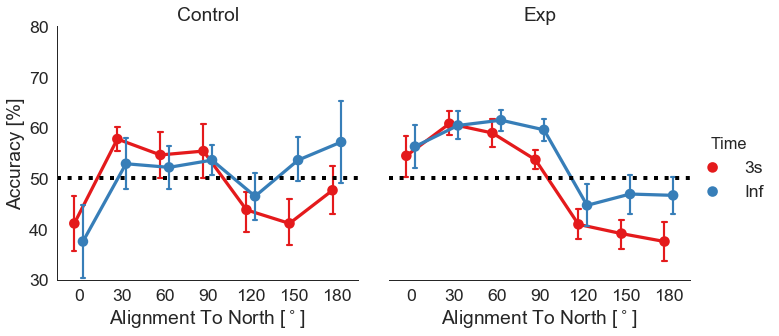

In [4]:
tmpdf = pd.read_csv(CSV_PATH + 'angletonorth_time_accuracy.csv')
display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .groupby(['Group','Repeated','AngleToNorth','Time'])
    .agg({'Accuracy':'mean'})
    .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
#     .query('Time == "Inf"')
)

display(tmpdf)
sns.set(context = "paper", style="white", palette="Set1", font_scale=2, rc={'figure.figsize':(12,15)})
g = sns.catplot(data=tmpdf, x='AngleToNorth', y='Accuracy [%]',hue='Time', 
                kind='point',dodge=0.2,scale = 1.5,
                col='Group', 
                ci=68, capsize=0.1, 
#                  edgecolor=(0,0,0),errwidth=3,linewidth=2
           )

g.set(yticks=np.arange(30,90,10))
i=0
for ax,title in zip(g.axes.flat,['Control','Exp']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 :
        ax.spines['left'].set_visible(False)
    ax.set(ylim=(30,80),xlabel='Alignment To North [$^\circ$]')
    ax.set_title(title)
    
plt.savefig(PLOTS_PATH+'alignmentToNorth_time_accuracy.png', quality=90)

# 3. Accuracy as function of angular difference between houses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 8 columns):
Subject        4464 non-null int64
Task           4464 non-null object
Time           4464 non-null object
AngularDiff    4464 non-null int64
Measurement    4464 non-null int64
Repeated       4464 non-null object
Accuracy       4464 non-null float64
Group          4464 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 279.1+ KB


None

,Group,Repeated,AngularDiff,Time,Accuracy [%]
0,Control,a,30,3s,55.555556
1,Control,a,30,Inf,44.444444
2,Control,a,60,3s,56.944444
3,Control,a,60,Inf,55.555556
4,Control,a,90,3s,47.222222
...,...,...,...,...,...
367,Exp,sq,120,Inf,51.388889
368,Exp,sq,150,3s,50.000000
369,Exp,sq,150,Inf,47.222222
370,Exp,sq,180,3s,56.944444


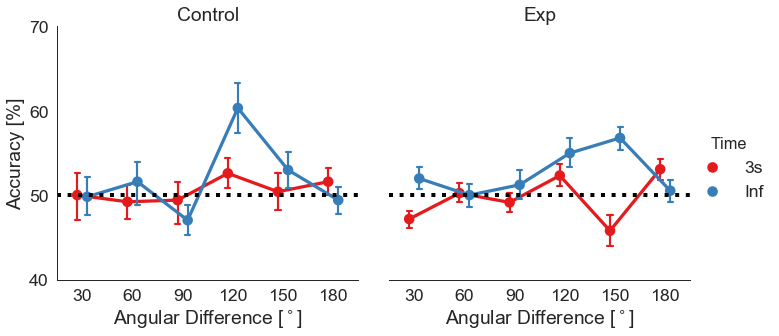

In [5]:
tmpdf = pd.read_csv(CSV_PATH + 'angulardifference_time_accuracy.csv')
display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .groupby(['Group','Repeated','AngularDiff','Time'])
    .agg({'Accuracy':'mean'})
    .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
#     .query('Time == "Inf"')
)

display(tmpdf)
sns.set(context = "paper", style="white", palette="Set1", font_scale=2, rc={'figure.figsize':(12,15)})
g = sns.catplot(data=tmpdf, x='AngularDiff', y='Accuracy [%]',hue='Time', 
                kind='point',dodge=0.2,scale = 1.5,
                col='Group', 
                ci=68, capsize=0.1, 
#                  edgecolor=(0,0,0),errwidth=3,linewidth=2
           )

g.set(yticks=np.arange(30,90,10))
i=0
for ax,title in zip(g.axes.flat,['Control','Exp']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 :
        ax.spines['left'].set_visible(False)
    ax.set(ylim=(40,70),xlabel='Angular Difference [$^\circ$]')
    ax.set_title(title)
    
plt.savefig(PLOTS_PATH+'angulardifference_time_accuracy.png', quality=90)

# 4. Accuracy as a function of distance

,Accuracy,Measurement,PrimeNr,TargetNr,TargetNr_correct,Task,Time,distance_prime_target,Group
3,42.857143,4,15,NaN,18.0,Relative,3s,31.740353,Control
7,85.714286,4,15,NaN,36.0,Relative,3s,158.913089,Control
11,71.428571,4,33,NaN,38.0,Relative,3s,60.406705,Control
15,71.428571,4,33,NaN,73.0,Relative,3s,69.766539,Control
19,14.285714,4,39,NaN,40.0,Relative,3s,91.731401,Control
...,...,...,...,...,...,...,...,...,...
559,50.000000,4,180,70.0,NaN,Pointing,Inf,80.795297,Exp
563,54.166667,4,189,32.0,NaN,Pointing,Inf,169.249077,Exp
567,70.833333,4,189,191.0,NaN,Pointing,Inf,39.635338,Exp
571,29.166667,4,193,11.0,NaN,Pointing,Inf,161.044621,Exp


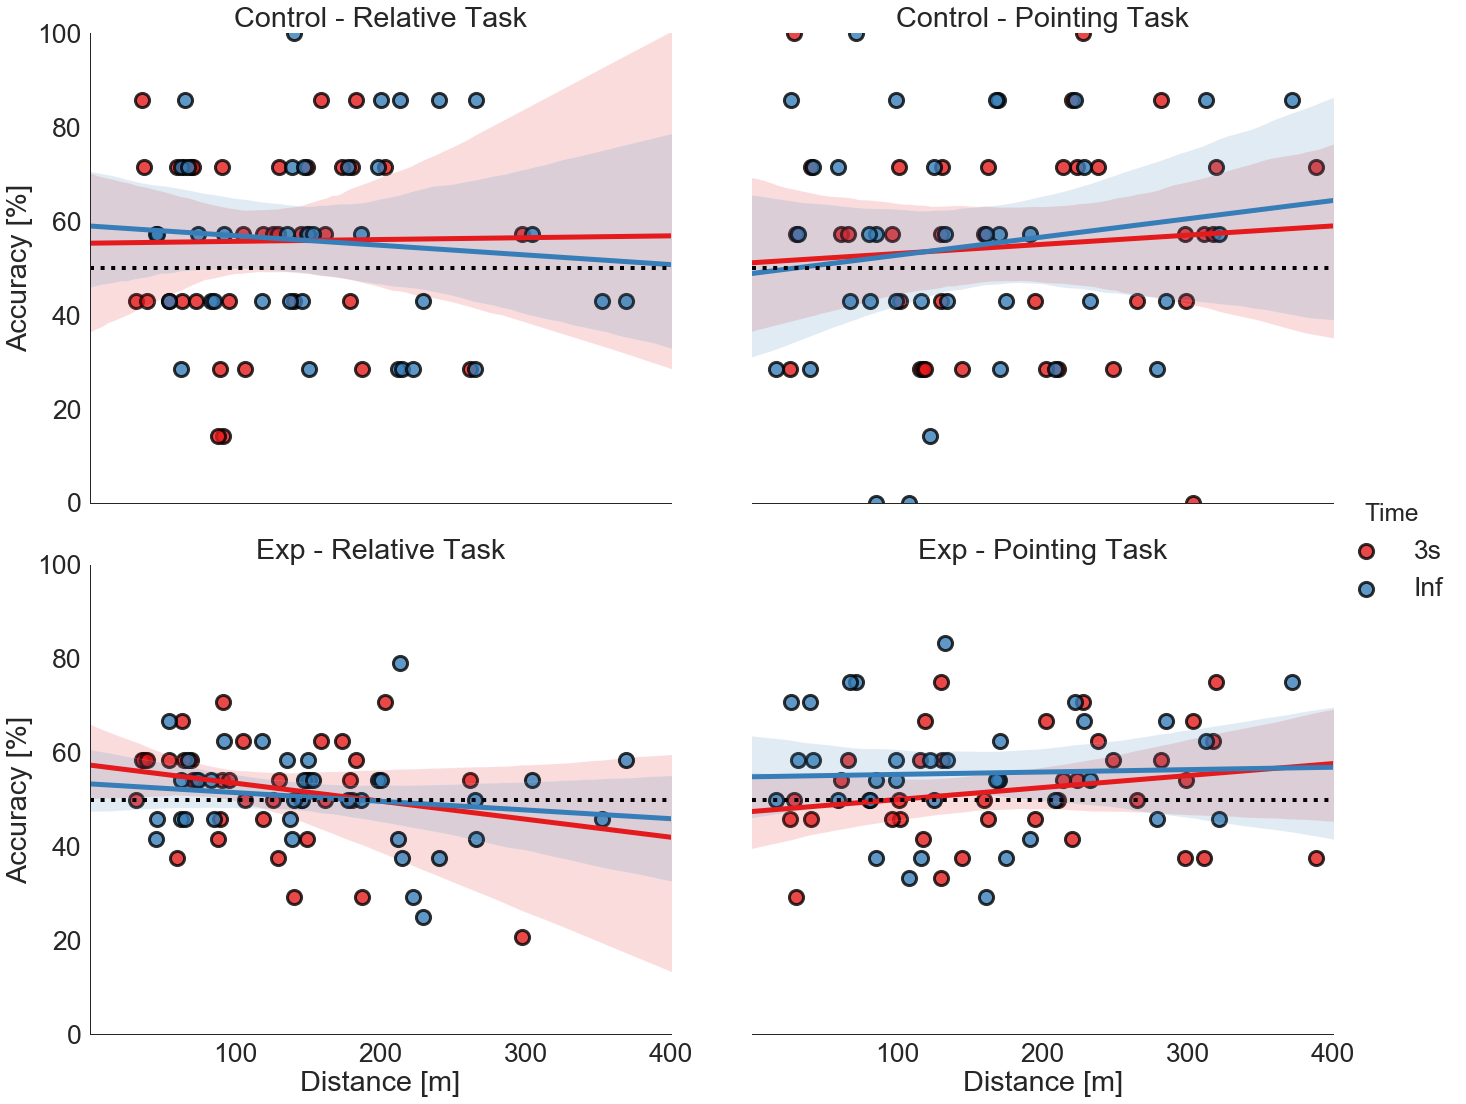

In [7]:
tmpdf = pd.concat(
    [pd.read_csv(CSV_PATH+'control_rel_point_distance_accuracy.csv'),
     pd.read_csv(CSV_PATH+'exp_rel_point_distance_accuracy.csv')]
)
tmpdf = (
    tmpdf.query('Measurement == 4')
)
tmpdf.Accuracy = tmpdf.Accuracy*100
#tmpdf.distance_prime_target.plot.kde()
display(tmpdf)

sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(10,10)})

g = sns.lmplot(data=tmpdf, x='distance_prime_target', y='Accuracy',hue='Time', 
               col='Task',row='Group', 
               x_ci='ci', ci=95, n_boot=1000,robust=True,
               height=8, aspect=1.2, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['Control - Relative Task','Control - Pointing Task','Exp - Relative Task', 'Exp - Pointing Task']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 and i!=3 :
        ax.spines['left'].set_visible(False)
#     ax.set(ylim=(40,70),xlabel='Angular Difference [$^\circ$]')
    ax.set_title(title)

g = (
    g
    .set_axis_labels("Distance [m]", "Accuracy [%]")
    .set(yticks=[0,20,40,60,80,100], ylim=(0,100))
    .set(xticks=[100,200,300,400], xlim=(0,400))
)

plt.savefig(PLOTS_PATH+'distance_time_accuracy_measurement_4.png', quality=90)

## 4.1 Linear Model to test Group, Time, distance effect on Accuracy -- Relative Task


In [10]:
# this probably does not make sense with different group sizes -> compare Measurement 1 and 4?!
tmpdf = pd.concat(
    [pd.read_csv(CSV_PATH+'control_rel_point_distance_accuracy.csv'),
     pd.read_csv(CSV_PATH+'exp_rel_point_distance_accuracy.csv')]
)
df = tmpdf.query('Task=="Relative"')
df = df.query('Group=="Exp"')
df1 = df.query('Measurement==1')
df2 = df.query('Measurement==4')
df = pd.concat([df1,df2])
display(df)
df.Accuracy = df.Accuracy*100

model = smf.ols('Accuracy ~ C(Measurement,Diff)+C(Time,Diff) + distance_prime_target +\
                C(Time,Diff):distance_prime_target + C(Measurement,Diff):distance_prime_target + \
                C(Measurement,Diff):C(Time,Diff):distance_prime_target',df).fit()
print('EXP RELATIVE distance effect complete model (Measurement 1 vs Measurement 4)')
display(model.summary())

# display(np.asarray(dmatrix("C(Group, Treatment(reference='Map'))", df)))
# display(np.asarray(dmatrix('C(Group,Diff)', df)))

,Accuracy,Measurement,PrimeNr,TargetNr,TargetNr_correct,Task,Time,distance_prime_target,Group
0,0.583333,1,15,NaN,18.0,Relative,3s,31.740353,Exp
4,0.458333,1,15,NaN,36.0,Relative,3s,158.913089,Exp
8,0.500000,1,33,NaN,38.0,Relative,3s,60.406705,Exp
12,0.541667,1,33,NaN,73.0,Relative,3s,69.766539,Exp
16,0.541667,1,39,NaN,40.0,Relative,3s,91.731401,Exp
...,...,...,...,...,...,...,...,...,...
271,0.541667,4,180,NaN,157.0,Relative,Inf,153.718737,Exp
275,0.583333,4,189,NaN,178.0,Relative,Inf,369.123746,Exp
279,0.625000,4,189,NaN,199.0,Relative,Inf,92.575645,Exp
283,0.458333,4,193,NaN,162.0,Relative,Inf,85.773248,Exp


EXP RELATIVE distance effect complete model (Measurement 1 vs Measurement 4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Accuracy   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.498
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.183
Time:                        15:24:32   Log-Likelihood:                -531.53
No. Observations:                 144   AIC:                             1077.
Df Residuals:                     137   BIC:                             1098.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              54.8931      1.810     30.327      0.000      51.314      58.472
C(Measurement, Diff)[D.1]                                               2.4521      3.620      0.677      0.499      -4.706       9.610
C(Time, Diff)[D.3s]                                                     0.3732      3.620      0.103      0.918      -6.785       7.532
distance_prime_target                                                  -0.0326      0.012     -2.769      0.006      -0.056      -0.009
C(Time, Diff)[D.3s]:distance_prime_target                               0.0088      0.024      0.375      0.708      -0.038       0.055
C(Measurement, Diff)[D.1]:distance_prime_target                        -0.0066      0.023     -0.281      0.779      -0.053       0.040
C(Measurement, Diff)[D.1]:C(Time, Diff)[D.3s]:distance_prime_target    -0.0077      0.022     -0.345      0.730      -0.052       0.037
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.206
Skew:                          -0.032   Prob(JB):                        0.902
Kurtosis:                       3.174   Cond. No.                         710.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4.2 Correlations to check individual slopes

In [11]:
print(f'Bonferroni corrected p-value threshold = {0.05/4}')

Bonferroni corrected p-value threshold = 0.0125


In [12]:
tmpdf = pd.concat(
    [pd.read_csv(CSV_PATH+'control_rel_point_distance_accuracy.csv'),
     pd.read_csv(CSV_PATH+'exp_rel_point_distance_accuracy.csv')]
)
# display(df.distance_prime_target.shape)
task = 'Relative'
tmpdf = tmpdf.query('Measurement==4')
df = tmpdf.query('Group =="Exp" and Task==@task and Time=="3s"')
print(f'Distance effect for Exp {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values))
df = tmpdf.query('Group =="Exp" and Task==@task and Time=="Inf"')
print(f'Distance effect for Exp {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Control" and Task==@task and Time=="3s"')
print(f'Distance effect for Control {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Control" and Task==@task and Time=="Inf"')
print(f'Distance effect for Control {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))

Distance effect for Exp Relative 3s


SpearmanrResult(correlation=-0.20149922732216563, pvalue=0.23861213437683437)

Distance effect for Exp Relative Inf


SpearmanrResult(correlation=-0.2070169998042342, pvalue=0.22572593456622342)

Distance effect for Control Relative 3s


SpearmanrResult(correlation=0.05286937142281684, pvalue=0.7594254625757391)

Distance effect for Control Relative Inf


SpearmanrResult(correlation=-0.06944435449268334, pvalue=0.6873545502649766)

# 5 Modelling Accuracy as function of distance for Pointing Task
## 5.1 Linear model

In [13]:
# this probably does not make sense with different group sizes -> compare Measurement 1 and 4?!
tmpdf = pd.concat(
    [pd.read_csv(CSV_PATH+'control_rel_point_distance_accuracy.csv'),
     pd.read_csv(CSV_PATH+'exp_rel_point_distance_accuracy.csv')]
)
df = tmpdf.query('Task=="Pointing"')
df = df.query('Group=="Exp"')
df1 = df.query('Measurement==1')
df2 = df.query('Measurement==4')
df = pd.concat([df1,df2])
display(df)
df.Accuracy = df.Accuracy*100

model = smf.ols('Accuracy ~ C(Measurement,Diff)+C(Time,Diff) + distance_prime_target +\
                C(Time,Diff):distance_prime_target + C(Measurement,Diff):distance_prime_target + \
                C(Measurement,Diff):C(Time,Diff):distance_prime_target',df).fit()
print('EXP RELATIVE distance effect complete model (Measurement 1 vs Measurement 4)')
display(model.summary())

# display(np.asarray(dmatrix("C(Group, Treatment(reference='Map'))", df)))
# display(np.asarray(dmatrix('C(Group,Diff)', df)))

,Accuracy,Measurement,PrimeNr,TargetNr,TargetNr_correct,Task,Time,distance_prime_target,Group
288,0.208333,1,15,75.0,NaN,Pointing,3s,29.904013,Exp
292,0.416667,1,15,132.0,NaN,Pointing,3s,219.940401,Exp
296,0.625000,1,33,9.0,NaN,Pointing,3s,101.704081,Exp
300,0.333333,1,33,177.0,NaN,Pointing,3s,194.766989,Exp
304,0.166667,1,39,30.0,NaN,Pointing,3s,298.237288,Exp
...,...,...,...,...,...,...,...,...,...
559,0.500000,4,180,70.0,NaN,Pointing,Inf,80.795297,Exp
563,0.541667,4,189,32.0,NaN,Pointing,Inf,169.249077,Exp
567,0.708333,4,189,191.0,NaN,Pointing,Inf,39.635338,Exp
571,0.291667,4,193,11.0,NaN,Pointing,Inf,161.044621,Exp


EXP RELATIVE distance effect complete model (Measurement 1 vs Measurement 4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Accuracy   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.201
Date:                Mon, 24 Feb 2020   Prob (F-statistic):             0.0465
Time:                        15:25:46   Log-Likelihood:                -566.12
No. Observations:                 144   AIC:                             1146.
Df Residuals:                     137   BIC:                             1167.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              49.3853      2.145     23.025      0.000      45.144      53.627
C(Measurement, Diff)[D.1]                                               4.3378      4.268      1.016      0.311      -4.102      12.778
C(Time, Diff)[D.3s]                                                     5.4919      4.290      1.280      0.203      -2.991      13.974
distance_prime_target                                                   0.0087      0.011      0.763      0.447      -0.014       0.031
C(Time, Diff)[D.3s]:distance_prime_target                              -0.0063      0.023     -0.274      0.785      -0.051       0.039
C(Measurement, Diff)[D.1]:distance_prime_target                         0.0097      0.023      0.426      0.670      -0.035       0.055
C(Measurement, Diff)[D.1]:C(Time, Diff)[D.3s]:distance_prime_target    -0.0097      0.023     -0.426      0.671      -0.055       0.035
==============================================================================
Omnibus:                        1.349   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.409
Skew:                          -0.223   Prob(JB):                        0.494
Kurtosis:                       2.812   Cond. No.                         775.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.2 Correlations

In [14]:
task = 'Pointing'
tmpdf = tmpdf.query('Measurement==4')
df = tmpdf.query('Group =="Exp" and Task==@task and Time=="3s"')
print(f'Distance effect for Exp {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Exp" and Task==@task and Time=="Inf"')
print(f'Distance effect for Exp {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Control" and Task==@task and Time=="3s"')
print(f'Distance effect for Control {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Control" and Task==@task and Time=="Inf"')
print(f'Distance effect for Control {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))

Distance effect for Exp Pointing 3s


SpearmanrResult(correlation=0.21726086340080453, pvalue=0.203079001722497)

Distance effect for Exp Pointing Inf


SpearmanrResult(correlation=-0.04470463013437331, pvalue=0.7957194181579634)

Distance effect for Control Pointing 3s


SpearmanrResult(correlation=0.09177053997607354, pvalue=0.5945069483455785)

Distance effect for Control Pointing Inf


SpearmanrResult(correlation=0.07498590202914829, pvalue=0.663816520177856)

# 6  Accuracy as function of FRS scales
## 6.1 Control group

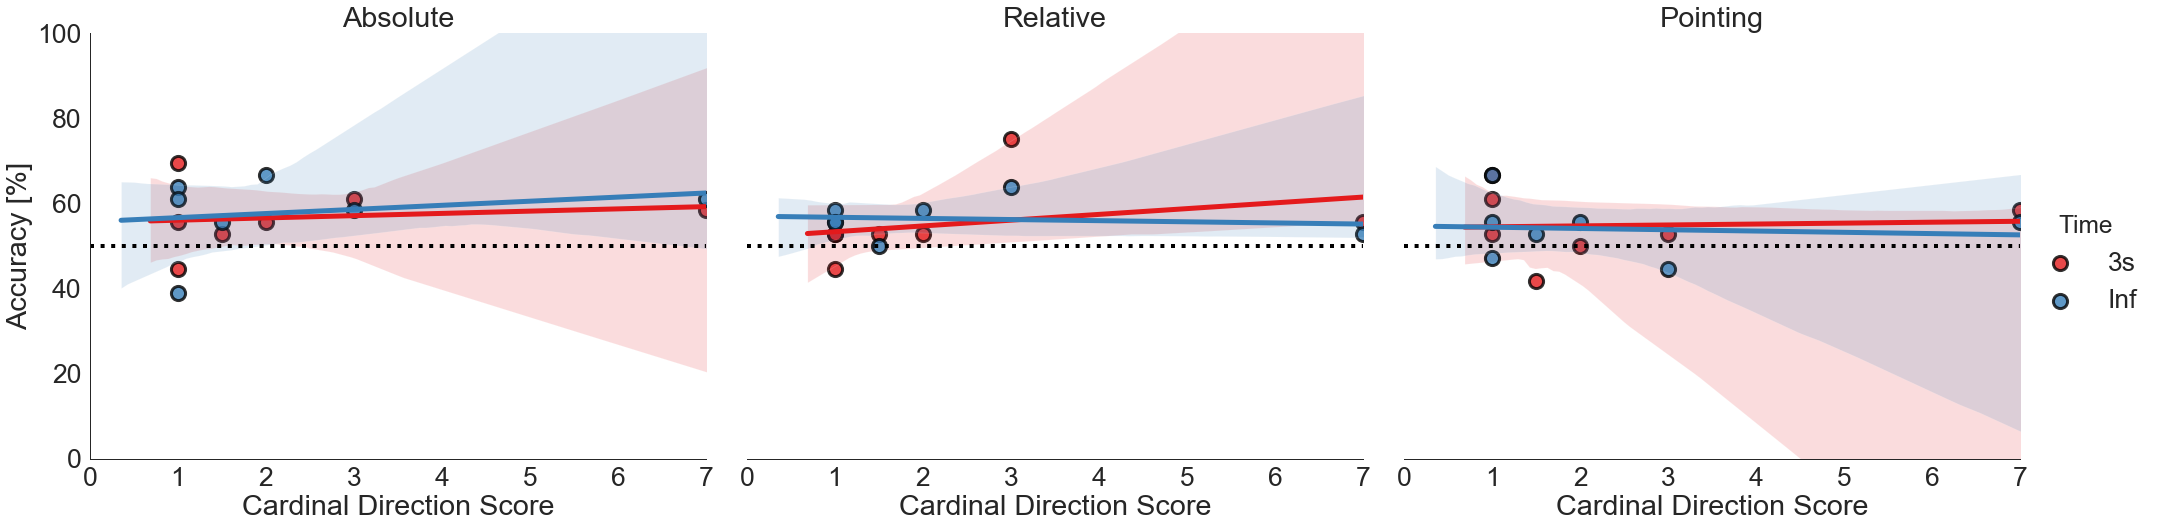

In [3]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_task4_time_FRS1_long.csv')
tmpdf = tmpdf[tmpdf['Group']=='Control']
tmpdf.Accuracy = tmpdf.Accuracy*100

sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(30,10)})

tmpdf = (tmpdf
         .query('Scale == "Cardinal Direction"')
         .rename(columns={'Accuracy': 'Accuracy [%]'})
)
g = sns.lmplot(data=tmpdf, x='Score', y='Accuracy [%]',hue='Time', 
               col='Task', row='Scale',
               x_ci='ci', ci=95, n_boot=1000,
#                robust=True,
               height=8, aspect=1.2, 
               sharex=False, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i not in [1,4,7]:
        ax.spines['left'].set_visible(False)
        
    ax.set(ylim=(0,100),xlim=(0,7), xlabel = 'Cardinal Direction Score')
    ax.set_title(title)
# plt.show()
plt.savefig(PLOTS_PATH+'/Control_task4_time_FRS1_correlation.png', quality=90)

## 6.2 Exp group

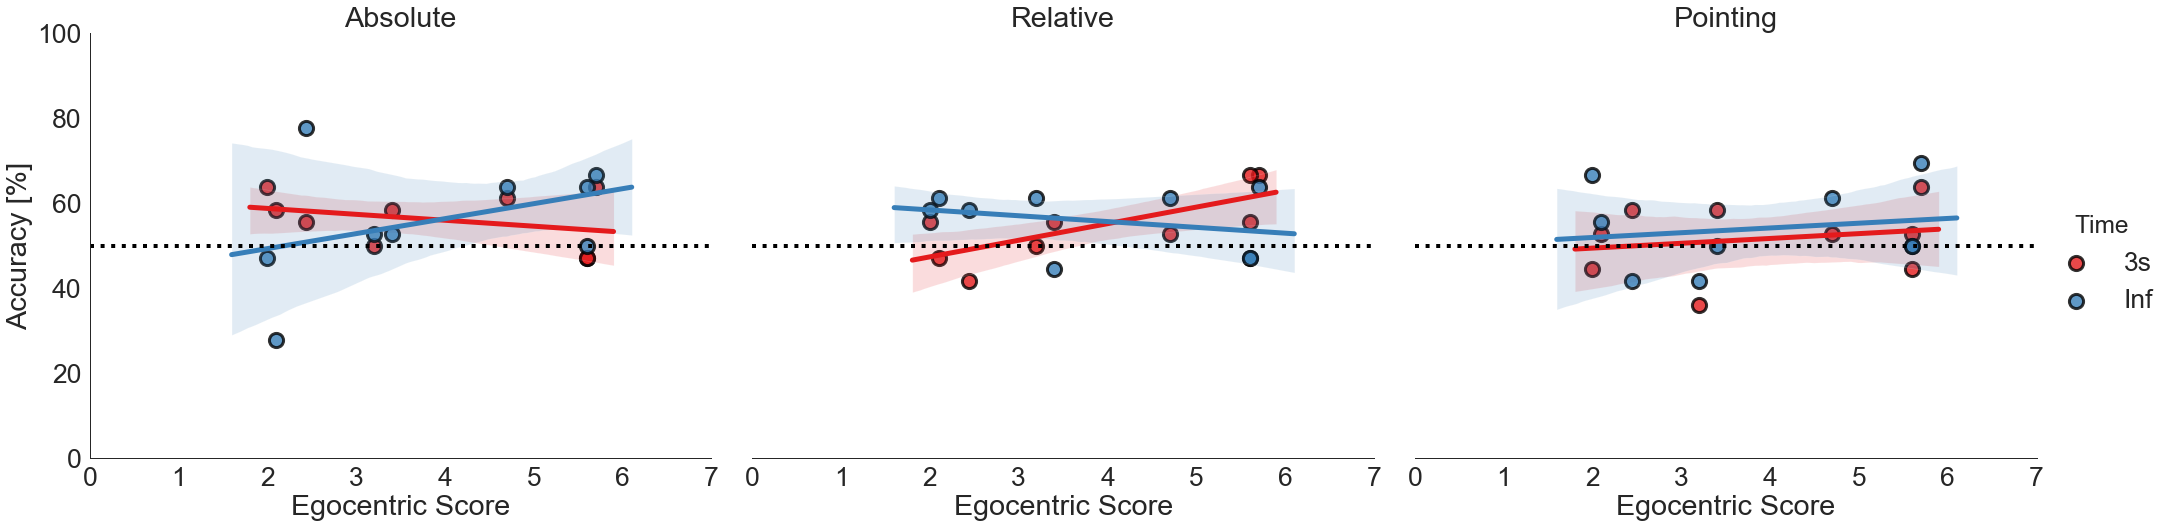

In [5]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_task4_time_FRS1_long.csv')
tmpdf = tmpdf[tmpdf['Group']=='Exp']
tmpdf.Accuracy = tmpdf.Accuracy*100
# display(tmpdf.head())
sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(30,10)})

tmpdf = (tmpdf
         .query('Scale == "Egocentric"')
         .rename(columns={'Accuracy': 'Accuracy [%]'})
)
g = sns.lmplot(data=tmpdf, x='Score', y='Accuracy [%]',hue='Time', 
               col='Task', row='Scale',
               x_ci='ci', ci=95, n_boot=1000,
#                robust=True,
               height=8, aspect=1.2, 
               sharex=False, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i not in [1,4,7]:
        ax.spines['left'].set_visible(False)
        
    ax.set(ylim=(0,100),xlim=(0,7), xlabel = 'Egocentric Score')
    ax.set_title(title)
# plt.show()
plt.savefig(PLOTS_PATH+'/Exp_task4_time_FRS1_correlation_egocentric.png', quality=90)

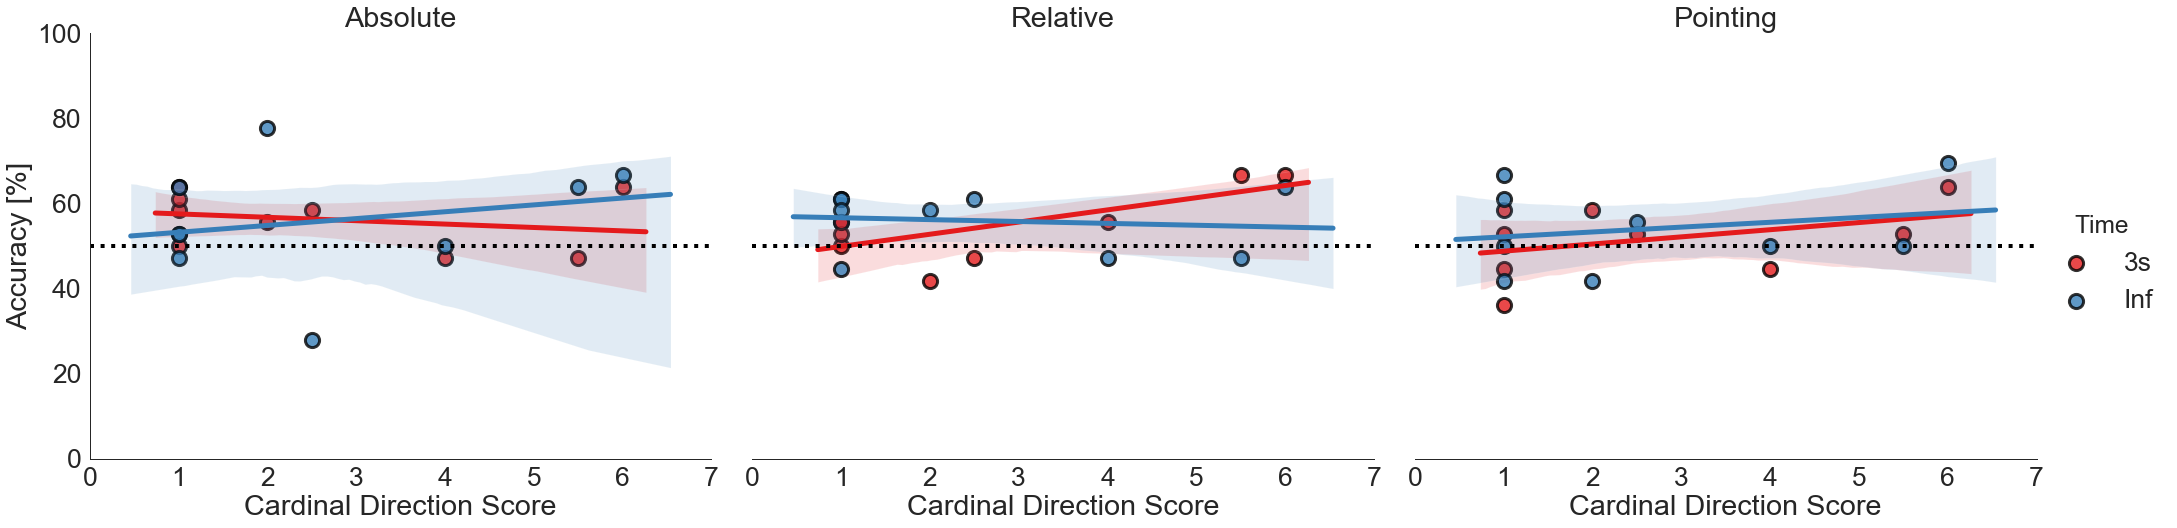

In [6]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_task4_time_FRS1_long.csv')
tmpdf = tmpdf[tmpdf['Group']=='Exp']
tmpdf.Accuracy = tmpdf.Accuracy*100
# display(tmpdf.head())
sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(30,10)})

tmpdf = (tmpdf
         .query('Scale == "Cardinal Direction"')
         .rename(columns={'Accuracy': 'Accuracy [%]'})
)
g = sns.lmplot(data=tmpdf, x='Score', y='Accuracy [%]',hue='Time', 
               col='Task', row='Scale',
               x_ci='ci', ci=95, n_boot=1000,
#                robust=True,
               height=8, aspect=1.2, 
               sharex=False, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i not in [1,4,7]:
        ax.spines['left'].set_visible(False)
        
    ax.set(ylim=(0,100),xlim=(0,7), xlabel = 'Cardinal Direction Score')
    ax.set_title(title)
# plt.show()
plt.savefig(PLOTS_PATH+'/Exp_task4_time_FRS1_correlation.png', quality=90)

## 6.3 Modelling accuracy vs FRS scales 

### 6.3.1 VR group,  Task, Time, Scale separated

** spearmanr correlation are performed. Spearmanr correlation should be considered since the FRS scale values are ranked.

In [15]:
print(f'Bonferroni corrected p-value threshold = {0.05/18}')

Bonferroni corrected p-value threshold = 0.002777777777777778


In [16]:
tmpdf = pd.read_csv(CSV_PATH+'/seahaven_VR_task_time_FRS_long.csv')
    
df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="3s" and Scale =="Egocentric" ')
print('Absolute Task 3s FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="3s" and Scale =="Allocentric" ')
print('Absolute Task 3s FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Absolute Task 3s FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="Inf" and Scale =="Egocentric" ')
print('Absolute Task Inf FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="Inf" and Scale =="Allocentric" ')
print('Absolute Task Inf FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Absolute Task Inf FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="3s" and Scale =="Egocentric" ')
print('Relative Task 3s FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="3s" and Scale =="Allocentric" ')
print('Relative Task 3s FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Relative Task 3s FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="Inf" and Scale =="Egocentric" ')
print('Relative Task Inf FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="Inf" and Scale =="Allocentric" ')
print('Relative Task Inf FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Relative Task Inf FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="3s" and Scale =="Egocentric" ')
print('Pointing Task 3s FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="3s" and Scale =="Allocentric" ')
print('Pointing Task 3s FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Pointing Task 3s FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="Inf" and Scale =="Egocentric" ')
print('Pointing Task Inf FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="Inf" and Scale =="Allocentric" ')
print('Pointing Task Inf FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Pointing Task Inf FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))




Absolute Task 3s FRS Egocentric 


SpearmanrResult(correlation=0.41303181360019886, pvalue=0.08845941889138277)

Absolute Task 3s FRS Allocentric 


SpearmanrResult(correlation=0.1773633790225394, pvalue=0.48138274163318384)

Absolute Task 3s FRS Cardinal Direction 


SpearmanrResult(correlation=-0.13147043182162774, pvalue=0.6030604610558974)

Absolute Task Inf FRS Egocentric 


SpearmanrResult(correlation=0.06708378084109824, pvalue=0.7914122394922699)

Absolute Task Inf FRS Allocentric 


SpearmanrResult(correlation=0.3697948767055706, pvalue=0.13093869844290532)

Absolute Task Inf FRS Cardinal Direction 


SpearmanrResult(correlation=0.47971979432065853, pvalue=0.04394334206045076)

Relative Task 3s FRS Egocentric 


SpearmanrResult(correlation=0.41624120341029386, pvalue=0.08576702107677041)

Relative Task 3s FRS Allocentric 


SpearmanrResult(correlation=0.2975540801650032, pvalue=0.23045615267987443)

Relative Task 3s FRS Cardinal Direction 


SpearmanrResult(correlation=0.3718455802365386, pvalue=0.12865094405531358)

Relative Task Inf FRS Egocentric 


SpearmanrResult(correlation=0.25039234702525803, pvalue=0.31627500545275133)

Relative Task Inf FRS Allocentric 


SpearmanrResult(correlation=0.45473686718643963, pvalue=0.05795885069278436)

Relative Task Inf FRS Cardinal Direction 


SpearmanrResult(correlation=0.34335235762225613, pvalue=0.16302123615234446)

Pointing Task 3s FRS Egocentric 


SpearmanrResult(correlation=0.029364040423153652, pvalue=0.9079208867252861)

Pointing Task 3s FRS Allocentric 


SpearmanrResult(correlation=0.2545275496654194, pvalue=0.30808087754678387)

Pointing Task 3s FRS Cardinal Direction 


SpearmanrResult(correlation=0.14721106449378668, pvalue=0.5599496608174177)

Pointing Task Inf FRS Egocentric 


SpearmanrResult(correlation=0.40474399574362313, pvalue=0.09569564689606615)

Pointing Task Inf FRS Allocentric 


SpearmanrResult(correlation=0.31832029754689906, pvalue=0.19796734222462017)

Pointing Task Inf FRS Cardinal Direction 


SpearmanrResult(correlation=0.007961787925693497, pvalue=0.9749870468154679)

### 6.3.2 Exp  group,  Task, Time, Scale separated
** Only showing Spearmanr correlation results

In [17]:
print(f'Bonferroni corrected p-value threshold = {0.05/18}')

Bonferroni corrected p-value threshold = 0.002777777777777778


In [7]:
tmpdf = pd.read_csv(CSV_PATH+'/seahaven_task4_time_FRS1_long.csv')

df = tmpdf.query('Group =="Exp" and Task == "Absolute" and Time=="3s" and Scale =="Egocentric" ')
print('Absolute Task 3s FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit')) # displays the correlation + pvalue
df = tmpdf.query('Group =="Exp" and Task == "Absolute" and Time=="3s" and Scale =="Allocentric" ')
print('Absolute Task 3s FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Absolute" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Absolute Task 3s FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="Exp" and Task == "Absolute" and Time=="Inf" and Scale =="Egocentric" ')
print('Absolute Task Inf FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Absolute" and Time=="Inf" and Scale =="Allocentric" ')
print('Absolute Task Inf FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Absolute" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Absolute Task Inf FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="Exp" and Task == "Relative" and Time=="3s" and Scale =="Egocentric" ')
print('Relative Task 3s FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Relative" and Time=="3s" and Scale =="Allocentric" ')
print('Relative Task 3s FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Relative" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Relative Task 3s FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="Exp" and Task == "Relative" and Time=="Inf" and Scale =="Egocentric" ')
print('Relative Task Inf FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Relative" and Time=="Inf" and Scale =="Allocentric" ')
print('Relative Task Inf FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Relative" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Relative Task Inf FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="Exp" and Task == "Pointing" and Time=="3s" and Scale =="Egocentric" ')
print('Pointing Task 3s FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Pointing" and Time=="3s" and Scale =="Allocentric" ')
print('Pointing Task 3s FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Pointing" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Pointing Task 3s FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="Exp" and Task == "Pointing" and Time=="Inf" and Scale =="Egocentric" ')
print('Pointing Task Inf FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Pointing" and Time=="Inf" and Scale =="Allocentric" ')
print('Pointing Task Inf FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Exp" and Task == "Pointing" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Pointing Task Inf FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

Absolute Task 3s FRS Egocentric model


SpearmanrResult(correlation=-0.22034689567839927, pvalue=0.5688807231550285)

Absolute Task 3s FRS Allocentric model


SpearmanrResult(correlation=-0.29538231539940274, pvalue=0.44030468679916945)

Absolute Task 3s FRS Cardinal Direction model


SpearmanrResult(correlation=-0.2291838836507762, pvalue=0.5530666676623213)

Absolute Task Inf FRS Egocentric model


SpearmanrResult(correlation=0.48523638696208493, pvalue=0.18548239272595138)

Absolute Task Inf FRS Allocentric model


SpearmanrResult(correlation=0.3613572969308877, pvalue=0.33932102451159385)

Absolute Task Inf FRS Cardinal Direction model


SpearmanrResult(correlation=0.25893137033865665, pvalue=0.5010988604120491)

Relative Task 3s FRS Egocentric model


SpearmanrResult(correlation=0.6710382186055988, pvalue=0.04784528737471388)

Relative Task 3s FRS Allocentric model


SpearmanrResult(correlation=0.3490151776110869, pvalue=0.35726811709670353)

Relative Task 3s FRS Cardinal Direction model


SpearmanrResult(correlation=0.4623363934533625, pvalue=0.2101910390035012)

Relative Task Inf FRS Egocentric model


SpearmanrResult(correlation=0.008585668058148864, pvalue=0.9825104950337005)

Relative Task Inf FRS Allocentric model


SpearmanrResult(correlation=0.17954621161490197, pvalue=0.643915486928666)

Relative Task Inf FRS Cardinal Direction model


SpearmanrResult(correlation=0.12055493694978446, pvalue=0.7573625105617114)

Pointing Task 3s FRS Egocentric model


SpearmanrResult(correlation=0.3219625521805824, pvalue=0.39815176447270095)

Pointing Task 3s FRS Allocentric model


SpearmanrResult(correlation=0.12824729401064427, pvalue=0.7422912172067173)

Pointing Task 3s FRS Cardinal Direction model


SpearmanrResult(correlation=0.3750598038437739, pvalue=0.31992847824009235)

Pointing Task Inf FRS Egocentric model


SpearmanrResult(correlation=0.14532037855153093, pvalue=0.7091162587598598)

Pointing Task Inf FRS Allocentric model


SpearmanrResult(correlation=0.15322617553657475, pvalue=0.6938931331909269)

Pointing Task Inf FRS Cardinal Direction model


SpearmanrResult(correlation=0.19115831652398646, pvalue=0.622239794121981)

# 7. Behavior in VR

In [3]:
# import calender file, only load specified columns
df = pd.read_excel(DATA_PATH+'Seahaven_alingment_project.xlsx', usecols='A,C:G')
df["Training"] = df["Training"].str.lower()
df = df[df.Discarded != 'yes']
# only keep identifier (letter)
df["Repeated"]= df["Repeated"].str[1:]
df.rename(columns={"Subject#": "Subject", "Measurement#": "Measurement"}, inplace=True)
# check if new spreadsheet is clean or clean it up! Old one is cleaned up!
Ctmpdf = (
    df
    .query('Measurement == 4')
    .query('Training == "belt_c"')
    [['Repeated']] 
)
Etmpdf = (
    df
    .query('Measurement == 4')
    .query('Training == "belt_e"')
    [['Repeated']] 
)
c_val_ids = Ctmpdf.Repeated.unique()
e_val_ids = Etmpdf.Repeated.unique()
c_measure = df[df.Training == "belt_c"][["Subject", "Measurement", "Repeated", "Training"]]
c_measure = c_measure[c_measure['Repeated'].isin(c_val_ids)]
c_val_subs = c_measure["Subject"].unique()
# get the data on all experimental participants
e_measure = df[df.Training == "belt_e"][["Subject", "Measurement", "Repeated", "Training"]]
e_measure = e_measure[e_measure['Repeated'].isin(e_val_ids)]
e_val_subs = e_measure["Subject"].unique()
# combine control and experimental subjects in one data frame
measure_df = pd.concat([c_measure, e_measure])
measure_df["Training"] = measure_df["Training"].str[-1]
subs = measure_df.Subject.to_list()
display(len(subs))

64

In [4]:
columnnames = ['x', 'z', 'y', 'rx', 'rz', 'ry', 'timestamp', 'PL_timestamp' ]
# display(tmpdf)
meanNrot = {'Subject':[], 'IndNorth':[]}
for subj in measure_df[measure_df["Measurement"]==4].Subject.values:
    tmpdf_1 = pd.read_csv(POS_PATH + f'positions_VP{subj}.txt', header=None, names=columnnames)
    meanNrot['Subject'].append(subj)
    meanNrot['IndNorth'].append(np.mean(tmpdf_1.rz.values[-30:]))
meanNrot = pd.DataFrame.from_dict(meanNrot)
meanNrot.Subject = meanNrot.Subject.astype(int)
# display(meanNrot) 

pathdf = pd.DataFrame()
for subj in subs:
    tmpdf_1 = pd.read_csv(POS_PATH + f'positions_VP{subj}.txt', header=None, names=columnnames)
    tmpdf_1['subject'] = subj
    pathdf = pd.concat([pathdf, tmpdf_1], ignore_index=True)

pathdf.x = pathdf.x.astype(int) - 180
pathdf.y = pathdf.y.astype(int) - 535

## 7.1 Participants' subjective rating of True North in VR

In [15]:
meanNrot['deviationFromNorth'] = abs(meanNrot.IndNorth-270)
# display(meanNrot)   
tmpdf = pd.read_csv(CSV_PATH + 'task_time_accuracy.csv')
# display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .query('Measurement==4')
    .query('Task =="Absolute"')
    .groupby(['Subject','Time'])
    .agg({'Accuracy':'mean'})
#     .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
)
# display(tmpdf)
meanNrot_time = meanNrot.merge(tmpdf, on='Subject')
# display(meanNrot_time)

degrees = np.mod(meanNrot.IndNorth.values - 270, 360)
radians = np.deg2rad(degrees)

bin_size = 1
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='steelblue', edgecolor='steelblue', linewidth=1)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rticks([ 1,  2]) 
ax.set_rmax(2.1)# Less radial ticks
ax.set_rlabel_position(120)
ax.grid(True)
plt.savefig(PLOTS_PATH+'/IndividualNorth.png', quality=90)
plt.show()

NameError: name 'meanNrot' is not defined

## 7.2 Correlating Accuracy with subjective rating of North direction

Pearson correlation deviation from North for Absolute 3s
(0.0925843393045755, 0.7330809786144147)
Pearson correlation deviation from North for Absolute Inf
(-0.2434007936469174, 0.36366917013881694)


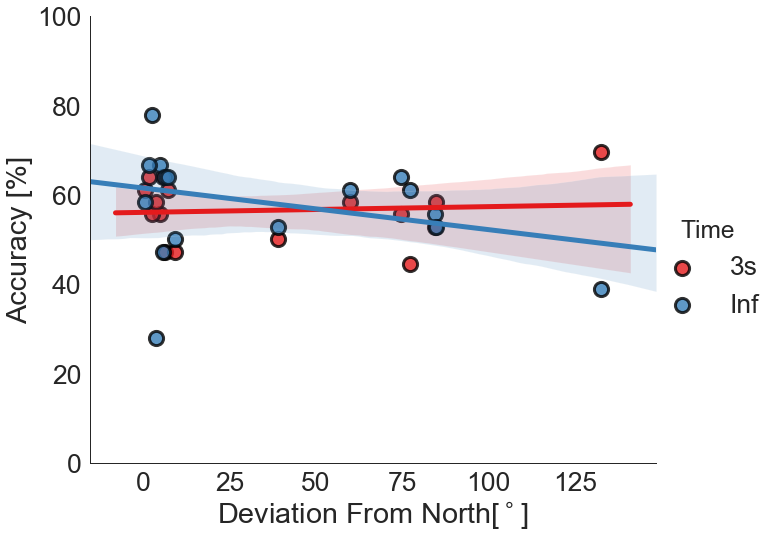

In [6]:
sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(10,10)})
# meanNrot_time.rename(columns={'Accuracy':'Accuracy [%]'}, inplace=True)
g = sns.lmplot(data=meanNrot_time, x='deviationFromNorth', y='Accuracy',hue='Time', 
               x_ci='ci', ci=95, n_boot=1000,robust=True,
               height=8, aspect=1.2, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})
g.set(ylim=(0,100), xlabel='Deviation From North[$^\circ$]', ylabel='Accuracy [%]')
df = meanNrot_time.query('Time == "3s"')
print("Pearson correlation deviation from North for Absolute 3s")
print(spstat.pearsonr(df.deviationFromNorth, df.Accuracy))
df = meanNrot_time.query('Time == "Inf"')
print("Pearson correlation deviation from North for Absolute Inf")
print(spstat.pearsonr(df.deviationFromNorth, df.Accuracy))
plt.savefig(PLOTS_PATH+'/deviationFromNorth_Accuracy.png', quality=90)

## 7.3 Density of Walked paths in Seahaven

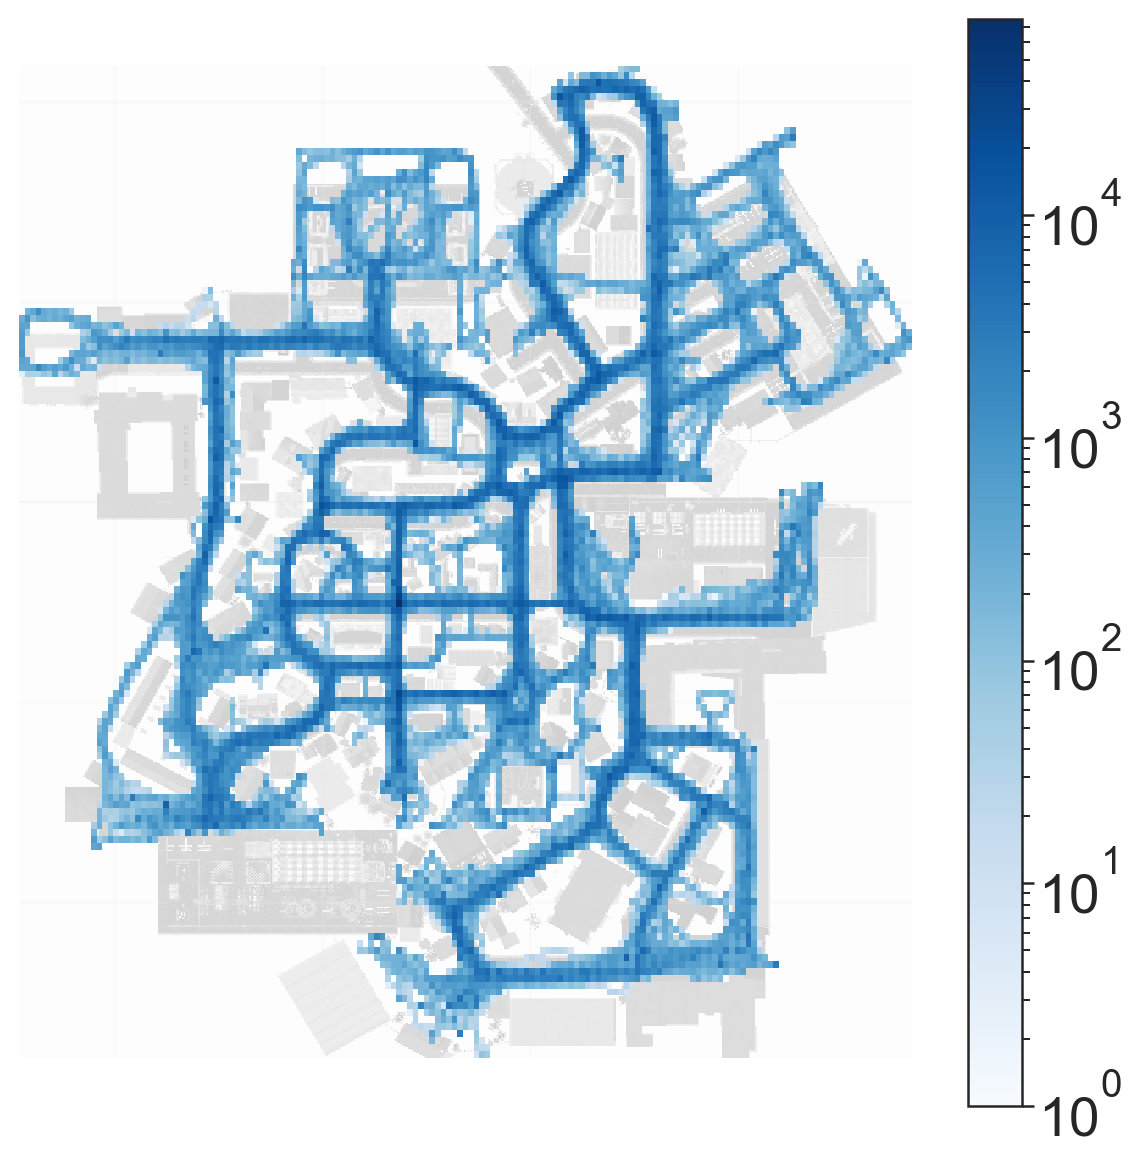

In [7]:
from matplotlib.colors import LogNorm, PowerNorm
map_img = plt.imread('./map_grey_1.png')

sns.set(context = "poster", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,15)})

_, ax = plt.subplots(figsize=(20,20))

im = ax.imshow(map_img, extent=[1, 450, 500,1], origin = 'lower')
H, xe, ye = np.histogram2d(pathdf.x.values, pathdf.y.values, bins=[143,161])
extent = [xe.min(),xe.max(),ye.min(),ye.max()]
img = ax.imshow(np.ma.masked_where(H == 0,H), interpolation='none', extent=[1, 450, 500,1], origin='lower', 
                cmap='Blues', norm=LogNorm())
# display(h[0].shape)
cbar = plt.colorbar(img, orientation= 'vertical' )

plt.gca().invert_yaxis()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_xticklabels([''])
plt.gca().set_yticklabels([''])
# plt.show()
plt.savefig(PLOTS_PATH+'/walked_paths.png', quality=90)

## 8. Familiarity of houses 
### 8.1 Based on dwelling time (VR)
This is not properly implemented yet!! Viewed houses files might come in handy here...

In [26]:
rep_measurements = pd.read_csv('{}/combinedSessions_newPartNumbers.csv'.format(EYE_DATA_PATH))
house_df = pd.read_csv('{}/seahaven_house_info.csv'.format(CSV_PATH))
# display(house_df.info())
# display(rep_measurements.head())

In [27]:
def mad_based_outlier(points, thresh=3.5):
    """ Median Absolute deviation based outlier detection.
    Ideally this method should be used to clean fixation durations."""
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score < thresh

In [1]:
eye_df = pd.DataFrame()
for subID, ses3 in zip(rep_measurements.newPartNumber.values, rep_measurements.Session3.values):
    try:
        tmpdf = pd.read_csv('{}gazes_{}.csv'.format(EYE_DATA_PATH,subID))
        tmpdf['Subject'] = ses3
        eye_df = pd.concat([eye_df, tmpdf], ignore_index=True)
    except OSError:
        print('{}gazes_{}.csv not found, Moving on.'.format(EYE_DATA_PATH,subID))   

# display(eye_df.head())
# display(eye_df.describe())

sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,15)})

eye_df = eye_df.query('House != "NH" and House != "sky" and House != "noData"')
print("House with maximum dwelling time:")
display(eye_df.loc[eye_df.Time.argmax()])
ax = eye_df.Time.plot.kde(label='before filtering', alpha=0.5,)
# dwelling time has large outliers, needs to be cleaned
eye_df = eye_df.loc[mad_based_outlier(eye_df.Time)]
display(eye_df.describe)
eye_df.Time.plot.kde(label='after filtering',ax=ax)
ax.set_xlabel('Dwelling Time (msec)')

NameError: name 'pd' is not defined

'Mean dwelling Time over houses and subjects: 574.7854218108351msec (SD=51.23039296332182)'

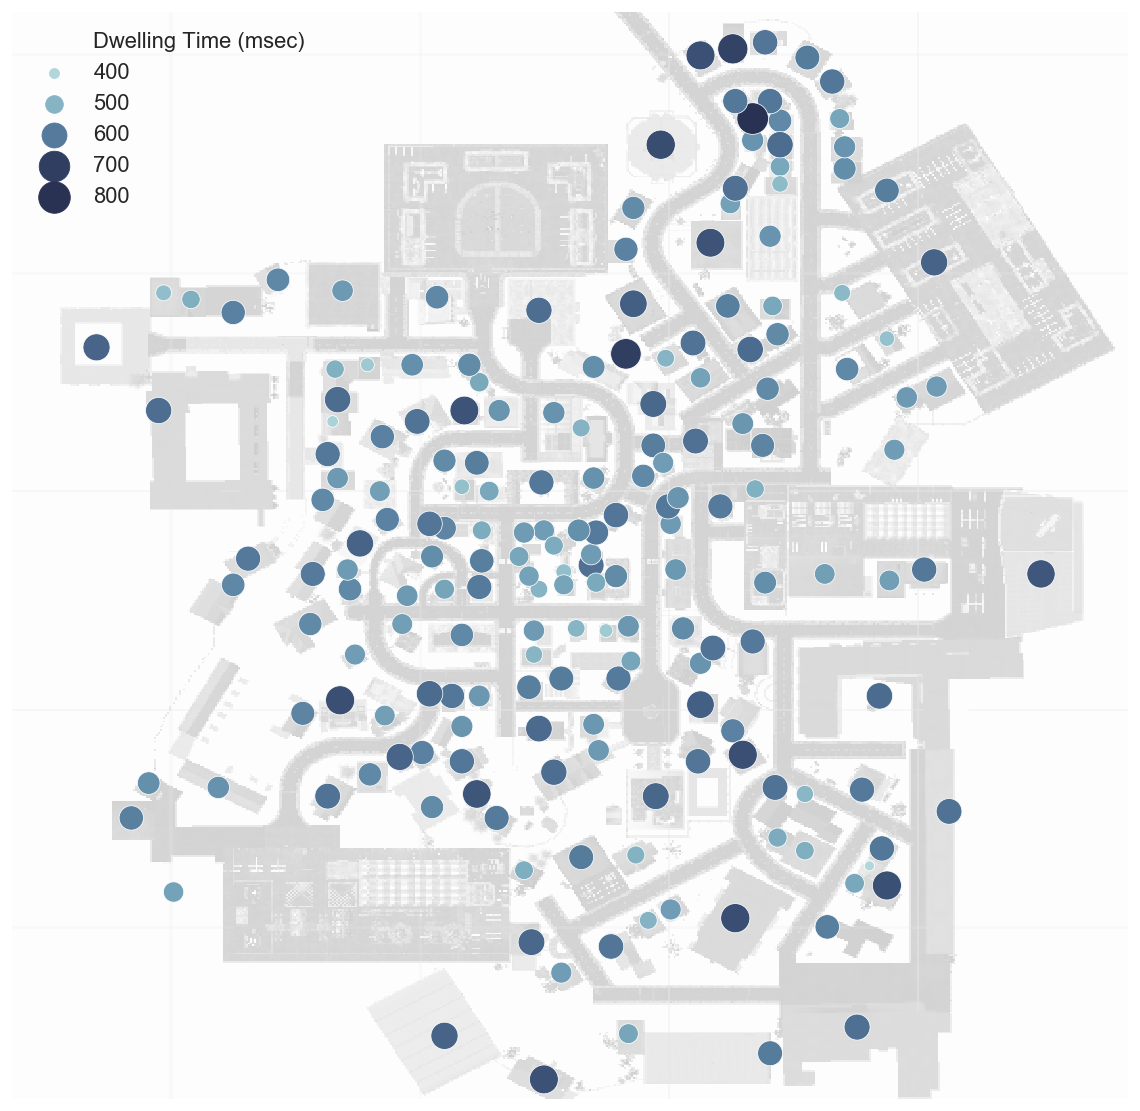

In [29]:
eye_df.House = eye_df.House.str.strip()
# sub_fixDur = eye_df.groupby(['Subject','House']).agg({'Time':'mean'})
eye_df[['HouseNr', 'Angle', 'Other']] = eye_df.House.str.split('_', expand=True)
eye_df.HouseNr = eye_df.HouseNr.astype(int)
eye_df = eye_df.merge(house_df, on = 'HouseNr')
sub_fixDur = eye_df.groupby(['HouseNr','x', 'y' ]).agg({'Time':'mean'}).reset_index()
display(f'Mean dwelling Time over houses and subjects: {sub_fixDur.Time.mean()}msec (SD={sub_fixDur.Time.std()})')
# rescaling x,y coordinates to fit 2D Map
sub_fixDur.x = sub_fixDur.x.astype(int) - 180
sub_fixDur.y = sub_fixDur.y.astype(int) - 535
sub_fixDur.Time = sub_fixDur.Time.astype(int)
# display(sub_fixDur.info())   


map_img = plt.imread('./map_grey.png')
# map_img = map_img.resize((450,500))
sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,9)})
# display(map_img.shape)
_, ax = plt.subplots(figsize=(20,20))

# cmap = sns.color_palette("Blues", as_cmap=True)
sub_fixDur.rename(columns={'Time':'Dwelling Time (msec)'}, inplace=True)

cmap = sns.cubehelix_palette(dark=0.2, light=0.8,rot=-.22, as_cmap=True)
ax.imshow(map_img, interpolation='nearest',aspect = 'auto',extent =[1,450,500,1], origin='upper')
ax = sns.scatterplot(x='y', y='x', hue='Dwelling Time (msec)', size='Dwelling Time (msec)',
                     sizes=(100, 1000), 
                     palette=cmap, 
                     data=sub_fixDur)


# plt.gca().invert_yaxis()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_xticklabels([''])
plt.gca().set_yticklabels([''])
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.legend(frameon =False)
plt.savefig(PLOTS_PATH+'/dwellingTime.png', quality=90, transparent=True)

In [30]:
house_task_df = pd.read_csv(f'{CSV_PATH}/seahaven_VR_house_task_accuracy.csv')
sub_fixDur = eye_df.groupby(['HouseNr','x', 'y' ]).agg({'Time':'mean'}).reset_index()
# display(sub_fixDur)
# display(house_task_df.head())
house_task_df[['PrimeNr','TargetNr','TargetNr_wrong']] = house_task_df[['PrimeNr','TargetNr','TargetNr_wrong']]\
                                                                                    .astype(int, errors='ignore')
abs_house = house_task_df.query('Task == "Absolute"')
# display(abs_house.head())

abs_house = abs_house.groupby(['PrimeNr']).agg({'Accuracy':"mean"}).reset_index()
# display(abs_house.head())

abs_house.rename(columns={'PrimeNr':'HouseNr'}, inplace=True)
abs_house_time = abs_house.merge(sub_fixDur, on=['HouseNr'])
# display(abs_house_time.head())

abs_house_time = abs_house_time[['HouseNr', 'Accuracy', 'Time']]
# display(abs_house_time.head())


rel_house = house_task_df.query('Task == "Relative"')
rel_house = rel_house.groupby(['PrimeNr', 'TargetNr', 'TargetNr_wrong']).agg({'Accuracy':"mean"}).reset_index()
rel_house_time = rel_house.merge(sub_fixDur, left_on = ['PrimeNr'], right_on=['HouseNr'], suffixes =('','_p'))
rel_house_time = rel_house_time.merge(sub_fixDur, left_on = ['TargetNr'], right_on=['HouseNr'], suffixes =('','_t'))
rel_house_time = rel_house_time.merge(sub_fixDur, left_on = ['TargetNr_wrong'], right_on=['HouseNr'], suffixes =('','_tw'))
# display(rel_house_time.columns)

rel_house_time['minTime'] = rel_house_time[['Time','Time_t','Time_tw']].min(axis=1)
rel_house_time['minWhichHouse'] = rel_house_time[['Time','Time_t','Time_tw']].idxmin(axis=1)
rel_house_time['minWhichHouse'] = rel_house_time['minWhichHouse']\
                                        .map({'Time':'PrimeNr','Time_t':'TargetNr','Time_tw':'TargetNr_wrong'})
# display(rel_house_time.head())
# display(rel_house_time.columns)
rel_house_time = rel_house_time[['PrimeNr', 'TargetNr', 'TargetNr_wrong', 'Accuracy',\
                                 'minTime', 'minWhichHouse']]
rel_house_time.loc[rel_house_time.minWhichHouse == 'PrimeNr','HouseNr'] = rel_house_time.loc[rel_house_time.minWhichHouse == 'PrimeNr', 'PrimeNr']
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr','HouseNr'] = rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr', 'TargetNr']
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr_wrong','HouseNr'] = rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr_wrong', 'TargetNr_wrong']

rel_house_time = rel_house_time[['HouseNr','Accuracy','minTime']]

rel_house_time.rename(columns={'minTime':'Time'}, inplace=True)

# display(rel_house_time.head())

point_house = house_task_df.query('Task == "Pointing"')
# display(point_house)
point_house = point_house.groupby(['PrimeNr', 'TargetNr']).agg({'Accuracy':"mean"}).reset_index()
point_house_time = point_house.merge(sub_fixDur, left_on = ['PrimeNr'], right_on=['HouseNr'], suffixes =('','_p'))
point_house_time = point_house_time.merge(sub_fixDur, left_on = ['TargetNr'], right_on=['HouseNr'], suffixes =('','_t'))
# display(point_house_time.columns)

point_house_time['minTime'] = point_house_time[['Time','Time_t']].min(axis=1)
point_house_time['minWhichHouse'] = point_house_time[['Time','Time_t']].idxmin(axis=1)
point_house_time['minWhichHouse'] = point_house_time['minWhichHouse'].map({'Time':'PrimeNr','Time_t':'TargetNr'})
# display(point_house_time.head())
# display(point_house_time.columns)
point_house_time = point_house_time[['PrimeNr', 'TargetNr', 'Accuracy',\
                                 'minTime', 'minWhichHouse']]
point_house_time.loc[point_house_time.minWhichHouse == 'PrimeNr','HouseNr'] = point_house_time.loc[point_house_time.minWhichHouse == 'PrimeNr', 'PrimeNr']
point_house_time.loc[point_house_time.minWhichHouse == 'TargetNr','HouseNr'] = point_house_time.loc[point_house_time.minWhichHouse == 'TargetNr', 'TargetNr']

point_house_time = point_house_time[['HouseNr','Accuracy','minTime']]
point_house_time.rename(columns={'minTime':'Time'}, inplace=True)

# display(point_house_time.head())

house_acc_dwelltime = pd.concat([abs_house_time,rel_house_time,point_house_time], ignore_index=True)
display(house_acc_dwelltime)

,HouseNr,Accuracy,Time
0,6.0,0.500000,508.080808
1,8.0,0.590909,576.213592
2,10.0,0.363636,545.023697
3,12.0,0.454545,548.697917
4,16.0,0.636364,551.395731
...,...,...,...
211,191.0,0.863636,603.658537
212,11.0,0.454545,499.435028
213,40.0,0.545455,526.666667
214,193.0,0.818182,576.625514


### 8.1.1 Correlating Accuracy with dwelling  time

Pearson Correlation for dwellTime vs Accuracy
(0.14035272734445164, 0.039303136250822636)


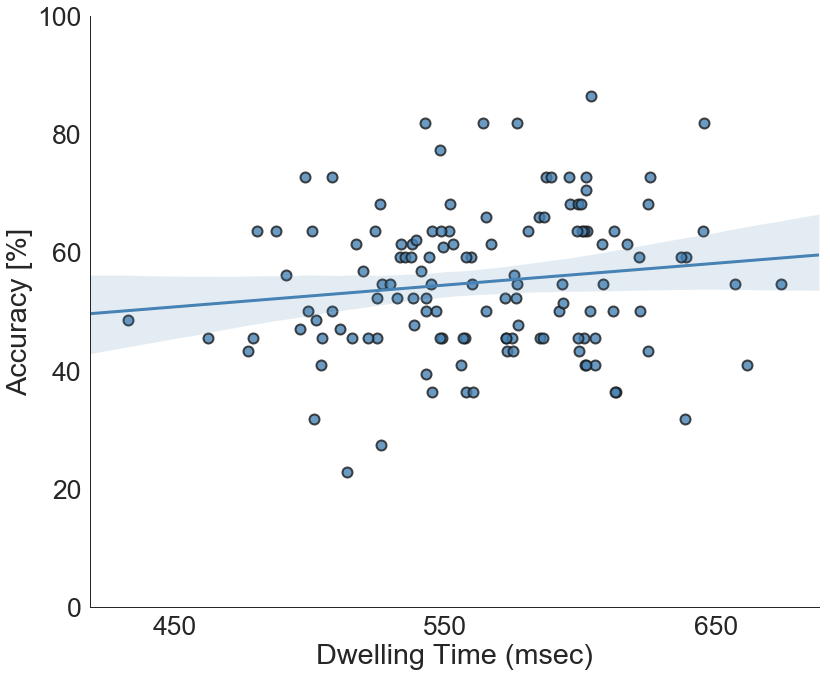

In [31]:
print("Pearson Correlation for dwellTime vs Accuracy")
print(spstat.pearsonr(house_acc_dwelltime.Accuracy,house_acc_dwelltime.Time))

df = house_acc_dwelltime.groupby(['HouseNr']).agg({'Time':'mean', 'Accuracy':'mean'}).reset_index()
df.Accuracy = df.Accuracy *100
df.rename(columns={'Time':'Dwelling Time (msec)', 'Accuracy':'Accuracy [%]'}, inplace=True)
# display(df)
sns.set(context = "paper", style="white", font_scale=3, rc={'figure.figsize':(10,10)})

ax = sns.lmplot(x='Dwelling Time (msec)', y='Accuracy [%]', data=df,height=10, aspect=1.2, 
                x_ci='ci', ci=95,
               scatter_kws={"s": 100, 'edgecolors':'k', 'linewidths': 2, 'color':'steelblue'},
               line_kws={'linewidth':3., 'color':'steelblue'})
ax.set(xticks=np.arange(450,700, 100), ylim=(0,100))
plt.savefig(PLOTS_PATH+'/dwellTime_vs_accuracy_VR.png', quality=90, transparent=True)

### 8.2.2 Dwelling Time vs Mouseclicks relationship as a measure of familiarity

In [2]:
df = house_acc_dwelltime.groupby(['HouseNr']).agg({'Time':'mean', 'Accuracy':'mean'}).reset_index()
df.Time = np.log(df.Time)
# display(df)
sns.set(context = "paper", style="white", font_scale=3, rc={'figure.figsize':(10,10)})
xticks = np.log(np.arange(25))
xlabels = [i for i in xticks]
yticks = np.log(np.arange(700))
ylabels = [i for i in yticks]
# _, ax = plt.subplots()
# ax.set(yscale='log', xscale='log')
ax = sns.regplot(x='clickNum', y='Time', data=df,
                x_ci='ci', ci=95,
               scatter_kws={"s": 100, 'edgecolors':'k', 'linewidths': 2, 'color':'steelblue'},
               line_kws={'linewidth':3., 'color':'steelblue'},
#                 logx=True
                )
ax.set(ylabel = 'log(Dwelling Time)', xlabel='log(Number of Clicks)',
#        xticks=range(1,4, 0.5),
#        yticks=df.Time[::300]
      )

plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.savefig(PLOTS_PATH+'/clickNum_vs_dwelltime.png', quality=90, transparent=True)
print("Pearson Correlation for log(Number of Clicks) vs log(DwellingTime)")
print(spstat.pearsonr(df.Time,df.clickNum))


NameError: name 'house_acc_dwelltime' is not defined

# Scratch Pad
